In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!pip install openpyxl

In [29]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\Pizza_ingredients.xlsx") # Load your dataset
df

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


# Dataset Overview

In [30]:
print("Dataset Overview:")

Dataset Overview:


In [31]:
print(df.info())  # Data types, non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB
None


In [34]:
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())  # Summary statistics for numerical columns


Summary Statistics for Numerical Columns:
       Items_Qty_In_Grams
count          514.000000
mean            30.564202
std             30.351623
min              5.000000
25%             10.000000
50%             20.000000
75%             40.000000
max            200.000000


# Missing Data Analysis

In [35]:
# Count missing values per column
print("\nMissing Data Count per Column:")


Missing Data Count per Column:


In [36]:
missing_values = df.isnull().sum()
print(missing_values)

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64


In [39]:
# Display rows that have missing data

In [40]:
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])  # Display rows with missing values


Rows with Missing Data:
    pizza_name_id            pizza_name   pizza_ingredients  \
24   brie_carre_s  The Brie Carre Pizza  Caramelized Onions   
149    hawaiian_l    The Hawaiian Pizza          Sliced Ham   
152    hawaiian_m    The Hawaiian Pizza          Sliced Ham   
155    hawaiian_s    The Hawaiian Pizza          Sliced Ham   

     Items_Qty_In_Grams  
24                  NaN  
149                 NaN  
152                 NaN  
155                 NaN  


In [42]:
# Unique Value Counts per Column

In [43]:
columns_of_interest = [
    'pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 
    'order_time', 'unit_price', 'total_price', 'pizza_size', 
    'pizza_category', 'pizza_ingredients'
]

In [56]:
# Print the number of unique values in each column
print("\nUnique Values Count per Column:")
for col in columns_of_interest:
    unique_count = df['pizza_name_id'].nunique()
    print(f"{'pizza_name_id'}: {unique_count} unique values")


Unique Values Count per Column:
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values
pizza_name_id: 91 unique values


In [57]:
# Display the unique values for each column
print("\nUnique Values for Each Column:")
for col in columns_of_interest:
    print(f"\nUnique values in {'pizza_name_id'}:")
    print(df['pizza_name_id'].unique())


Unique Values for Each Column:

Unique values in pizza_name_id:
['bbq_ckn_l' 'bbq_ckn_m' 'bbq_ckn_s' 'big_meat_s' 'brie_carre_s'
 'calabrese_l' 'calabrese_m' 'calabrese_s' 'cali_ckn_l' 'cali_ckn_m'
 'cali_ckn_s' 'ckn_alfredo_l' 'ckn_alfredo_m' 'ckn_alfredo_s'
 'ckn_pesto_l' 'ckn_pesto_m' 'ckn_pesto_s' 'classic_dlx_l' 'classic_dlx_m'
 'classic_dlx_s' 'five_cheese_l' 'four_cheese_l' 'four_cheese_m'
 'green_garden_l' 'green_garden_m' 'green_garden_s' 'hawaiian_l'
 'hawaiian_m' 'hawaiian_s' 'ital_cpcllo_l' 'ital_cpcllo_m' 'ital_cpcllo_s'
 'ital_supr_l' 'ital_supr_m' 'ital_supr_s' 'ital_veggie_l' 'ital_veggie_m'
 'ital_veggie_s' 'mediterraneo_l' 'mediterraneo_m' 'mediterraneo_s'
 'mexicana_l' 'mexicana_m' 'mexicana_s' 'napolitana_l' 'napolitana_m'
 'napolitana_s' 'pep_msh_pep_l' 'pep_msh_pep_m' 'pep_msh_pep_s'
 'pepperoni_l' 'pepperoni_m' 'pepperoni_s' 'peppr_salami_l'
 'peppr_salami_m' 'peppr_salami_s' 'prsc_argla_l' 'prsc_argla_m'
 'prsc_argla_s' 'sicilian_l' 'sicilian_m' 'sicilian_s' 's

In [51]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
print(duplicate_rows)


Number of Duplicate Rows: 0
Empty DataFrame
Columns: [pizza_name_id, pizza_name, pizza_ingredients, Items_Qty_In_Grams]
Index: []


In [ ]:
# Plot distributions for categorical variables
categorical_columns = ['pizza_name_id', 'pizza_name', 'pizza_ingredients', 'Items_Qty_In_Grams']

for col in categorical_columns:
    plt.figure(figsize=(10, 6)
    sns.countplot(x='pizza_name_id', df=df, order=df['pizza_name_id'].value_counts().index)
    plt.title(f"Distribution of {'pizza_name_id'}")
    plt.xticks(rotation=45)
    plt.show()

In [81]:
# Verbal explanation
print(f"\nDistribution analysis for {col}:")
print(f" - There are {df[col].nunique()} unique values in {col}.")
print(f" - The most frequent value is '{df[col].mode()[0]}' with {df[col].value_counts().iloc[0]} occurrences.")
print(f" - The distribution is {'skewed' if df[col].value_counts().iloc[0] / len(df) > 0.5 else 'balanced'}.")


Distribution analysis for pizza_name_id:
 - There are 91 unique values in pizza_name_id.
 - The most frequent value is 'mexicana_l' with 8 occurrences.
 - The distribution is balanced.


In [97]:
# Plot distributions for numerical variables
numerical_columns = ['pizza_name']

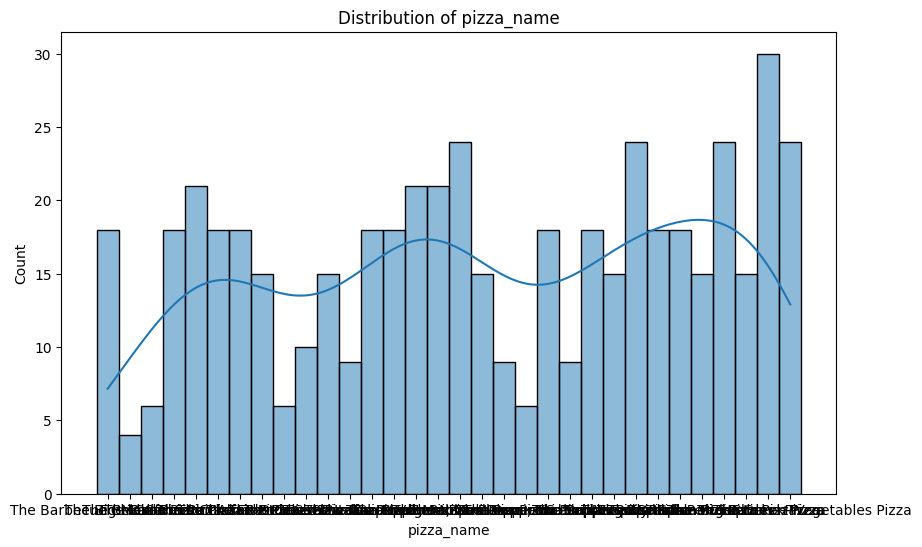

In [98]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [90]:
# Verbal explanation
print(f"\nDistribution analysis for {col}:")
print(f" - Mean: {df[col].mean()}")
print(f" - Median: {df[col].median()}")
print(f" - The distribution {'has a skew' if abs(df[col].skew()) > 0.5 else 'is fairly normal'}. Skewness: {df[col].skew()}.")


Distribution analysis for Items_Qty_In_Grams:
 - Mean: 30.56420233463035
 - Median: 20.0
 - The distribution has a skew. Skewness: 2.3815523884601726.


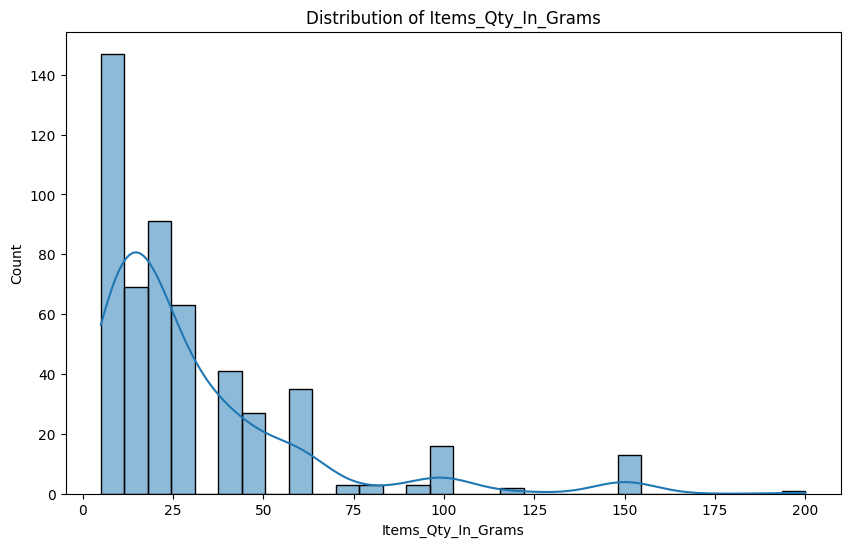

In [92]:
# Plot distributions for numerical variables
numerical_columns = ['Items_Qty_In_Grams']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\Pizza_Sale.xlsx")
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [106]:
# Dataset Overview

In [108]:
print("Dataset Overview:")
print(df.info())  # Data types, non-null count
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())  # Summary statistics for numerical columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None

Summary Statistics for Numerical Columns:
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.00

#Missing Data Analysis

In [110]:
# Count missing values per column
print("\nMissing Data Count per Column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Data Count per Column:
pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [111]:
# Display rows that have missing data
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])  # Display rows with missing values



Rows with Missing Data:
     pizza_id  order_id  pizza_name_id  quantity           order_date  \
36         37        15            NaN         1  2015-01-01 00:00:00   
37         38        15            NaN         1  2015-01-01 00:00:00   
38         39        15            NaN         1  2015-01-01 00:00:00   
39         40        16            NaN         1  2015-01-01 00:00:00   
40         41        16            NaN         1  2015-01-01 00:00:00   
..        ...       ...            ...       ...                  ...   
783       784       342     sicilian_l         1  2015-06-01 00:00:00   
784       785       342   southw_ckn_l         1  2015-06-01 00:00:00   
785       786       343  five_cheese_l         1  2015-06-01 00:00:00   
786       787       343  four_cheese_m         1  2015-06-01 00:00:00   
787       788       344  ital_cpcllo_m         1  2015-06-01 00:00:00   

    order_time  unit_price  total_price pizza_size pizza_category  \
36    13:33:00       18.50   

In [112]:
# Unique Value Counts per Column
# ===============================
columns_of_interest = [
    'pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 
    'order_time', 'unit_price', 'total_price', 'pizza_size', 
    'pizza_category', 'pizza_ingredients'
]

In [114]:
# Print the number of unique values in each column
print("\nUnique Values Count per Column:")
for col in columns_of_interest:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")


Unique Values Count per Column:
pizza_id: 48620 unique values
order_id: 21350 unique values
pizza_name_id: 91 unique values
quantity: 4 unique values
order_date: 358 unique values
order_time: 16382 unique values
unit_price: 25 unique values
total_price: 56 unique values
pizza_size: 5 unique values
pizza_category: 4 unique values
pizza_ingredients: 32 unique values


In [115]:
# Display the unique values for each column
print("\nUnique Values for Each Column:")
for col in columns_of_interest:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique Values for Each Column:

Unique values in pizza_id:
[    1     2     3 ... 48618 48619 48620]

Unique values in order_id:
[    1     2     3 ... 21348 21349 21350]

Unique values in pizza_name_id:
['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' nan 'calabrese_m'
 'four_cheese_m' 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s'
 'spinach_fet_l' 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m'
 'southw_ckn_s' 'bbq_ckn_m' 'pepperoni_m' 'prsc_argla_s' 'sicilian_m'
 'veggie_veg_l' 'ckn_alfredo_s' 'pepperoni_s' 'green_garden_l'
 'green_garden_m' 'pep_msh_pep_l' 'hawaiian_s' 'four_cheese_l'
 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l

In [116]:
# Duplicate Records
# ===============================
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
print(duplicate_rows)


Number of Duplicate Rows: 0
Empty DataFrame
Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


In [117]:
# Column-Wise Analysis (Distributions with Explanations)
# ===============================
# Plot distributions for categorical variables
categorical_columns = ['pizza_id', 'pizza_name_id', 'pizza_size', 'pizza_category']


In [122]:
# Verbal explanation
print(f"\nDistribution analysis for {col}:")
print(f" - There are {df[col].nunique()} unique values in {col}.")
print(f" - The most frequent value is '{df[col].mode()[0]}' with {df[col].value_counts().iloc[0]} occurrences.")
print(f" - The distribution is {'skewed' if df[col].value_counts().iloc[0] / len(df) > 0.5 else 'balanced'}.")


Distribution analysis for pizza_id:
 - There are 48620 unique values in pizza_id.
 - The most frequent value is '1' with 1 occurrences.
 - The distribution is balanced.


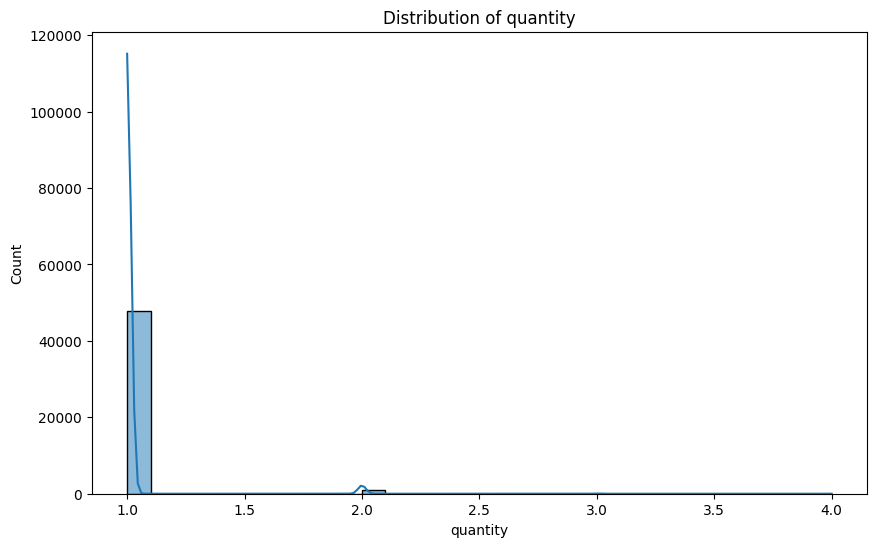

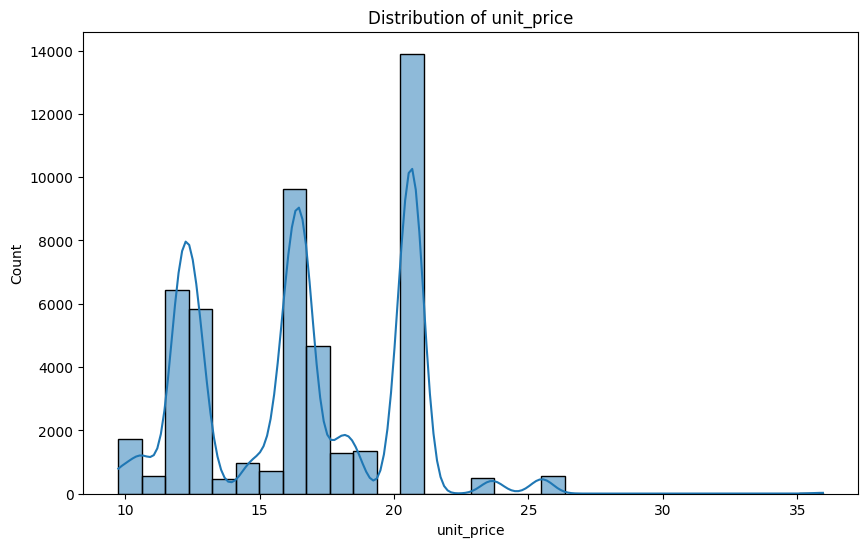

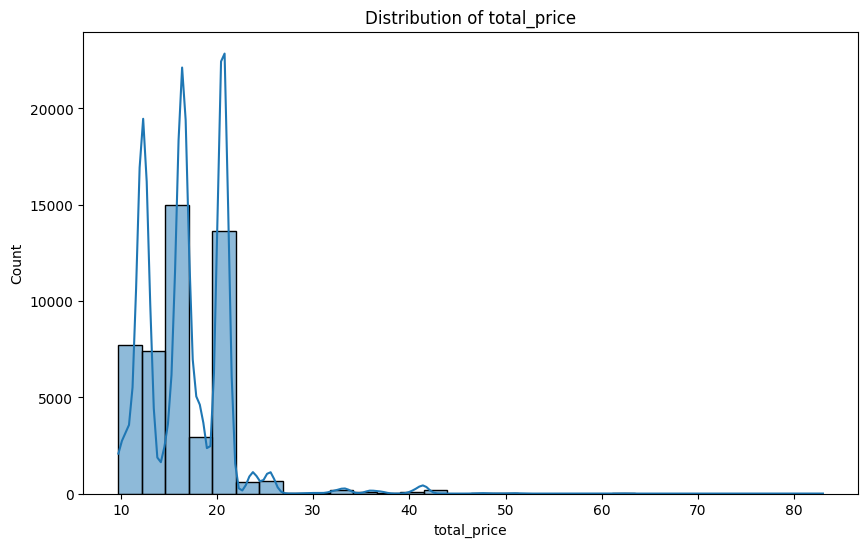

In [124]:
# Plot distributions for numerical variables
numerical_columns = ['quantity', 'unit_price', 'total_price']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [125]:
# Verbal explanation
print(f"\nDistribution analysis for {col}:")
print(f" - Mean: {df[col].mean()}")
print(f" - Median: {df[col].median()}")
print(f" - The distribution {'has a skew' if abs(df[col].skew()) > 0.5 else 'is fairly normal'}. Skewness: {df[col].skew()}.")


Distribution analysis for total_price:
 - Mean: 16.821494250509122
 - Median: 16.5
 - The distribution has a skew. Skewness: 1.7330090941245695.


In [126]:
# Correlation Analysis with Explanations
# ===============================
# Correlation matrix for numerical variables
corr_matrix = df[numerical_columns].corr()
print("\nCorrelation Matrix:\n", corr_matrix)



Correlation Matrix:
              quantity  unit_price  total_price
quantity     1.000000    0.007142     0.541950
unit_price   0.007142    1.000000     0.836072
total_price  0.541950    0.836072     1.000000


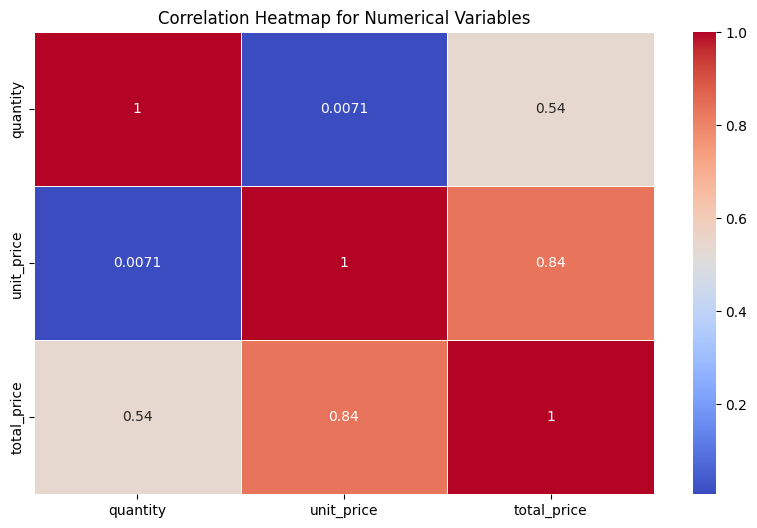

In [127]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

In [128]:
# Verbal explanation of correlations
print("\nCorrelation Analysis:")
for col in numerical_columns:
    high_corr = corr_matrix[col][corr_matrix[col] > 0.7].drop(col)
    if len(high_corr) > 0:
        print(f" - '{col}' is highly correlated with {', '.join(high_corr.index)} (correlation > 0.7).")
    else:
        print(f" - '{col}' has no strong correlations with other numerical variables.")


Correlation Analysis:
 - 'quantity' has no strong correlations with other numerical variables.
 - 'unit_price' is highly correlated with total_price (correlation > 0.7).
 - 'total_price' is highly correlated with unit_price (correlation > 0.7).


In [130]:
# Time Series Analysis (Seasonality, Trends, Noise with Explanations)
# ===============================
# Convert 'order_date' to datetime and check for missing/invalid dates
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
invalid_dates = df[df['order_date'].isnull()]
print(f"\nNumber of Invalid Dates: {len(invalid_dates)}")


Number of Invalid Dates: 0


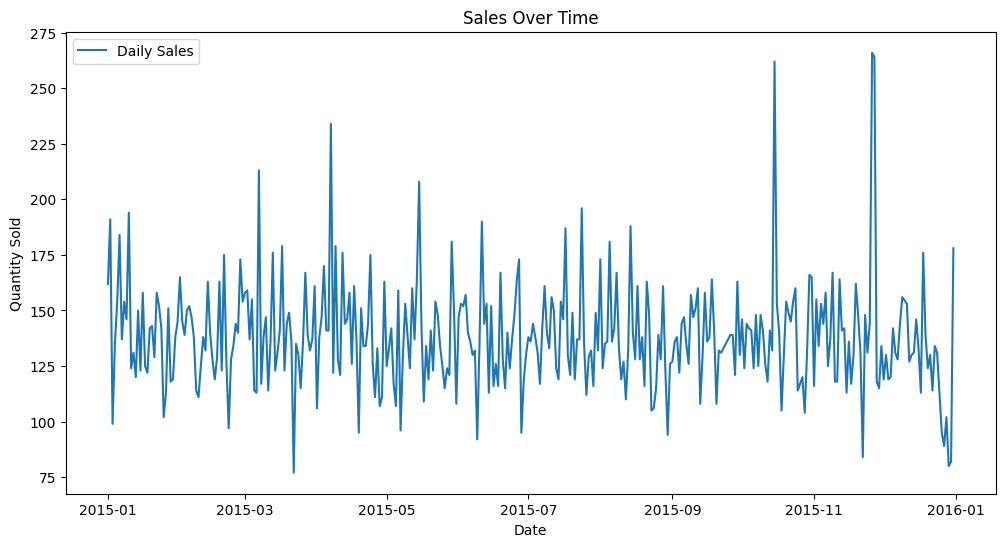

In [132]:
# Plot sales over time
sales_by_date = df.groupby('order_date')['quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date, label='Daily Sales')
plt.title("Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

In [133]:
# Verbal explanation of time series
print("\nTime Series Analysis of Sales Over Time:")
print(f" - Total number of sales records: {len(sales_by_date)}")
print(f" - Sales peaks around certain dates, which could indicate promotions or seasonal trends.")
print(f" - There {'is' if sales_by_date.diff().std() > 10 else 'is no'} significant volatility in daily sales.")


Time Series Analysis of Sales Over Time:
 - Total number of sales records: 358
 - Sales peaks around certain dates, which could indicate promotions or seasonal trends.
 - There is significant volatility in daily sales.


In [134]:
# Monthly sales trends
df['Month'] = df['order_date'].dt.month
monthly_sales = df.groupby('Month')['quantity'].sum()

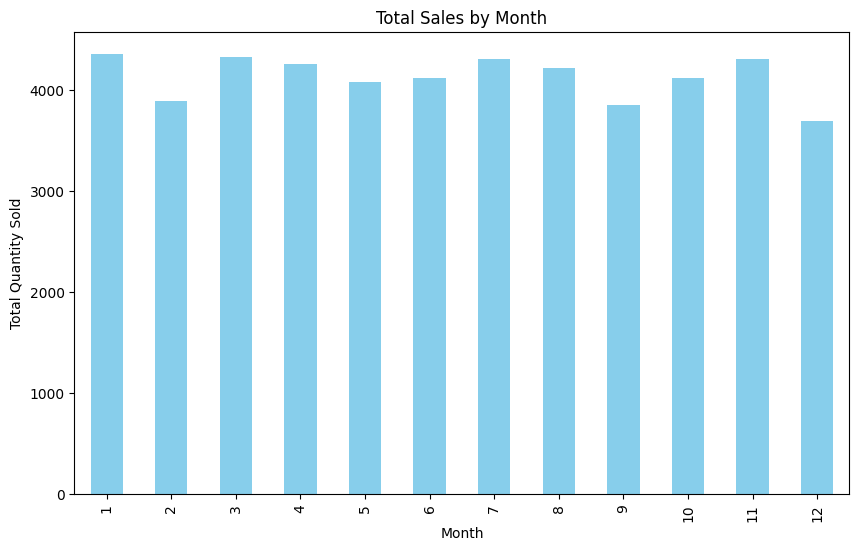

In [135]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.show()

In [136]:
# Verbal explanation of monthly trends
print("\nMonthly Sales Trend:")
print(f" - The highest sales occurred in month {monthly_sales.idxmax()} with {monthly_sales.max()} units sold.")
print(f" - The lowest sales occurred in month {monthly_sales.idxmin()} with {monthly_sales.min()} units sold.")
print(f" - There is {'clear seasonality' if monthly_sales.max() > 1.5 * monthly_sales.mean() else 'no strong seasonal pattern'} in sales.")


Monthly Sales Trend:
 - The highest sales occurred in month 1 with 4361 units sold.
 - The lowest sales occurred in month 12 with 3696 units sold.
 - There is no strong seasonal pattern in sales.


In [137]:
df = pd.read_excel(r"C:\Users\Dell\Downloads\Pizza_ingredients.xlsx") # Load your dataset
df

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


#Data Cleaning

In [139]:
# Print column names to check for discrepancies
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')


In [140]:
# Print the first few rows to verify data
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   

   Items_Qty_In_Grams  
0                40.0  
1                15.0  
2                20.0  
3                30.0  
4                60.0  


In [142]:
import pandas as pd
from dateutil.parser import parse

In [145]:
# Check for Missing Values
# ===============================
print("\nChecking Missing Values:")
missing_before = df.isnull().sum()
print("Missing values before any processing:\n", missing_before)


Checking Missing Values:
Missing values before any processing:
 pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64


In [146]:
# Convert Date and Time to Proper Format
# ===============================
def convert_dates(date_series):
    return date_series.apply(lambda x: parse(x, dayfirst=False).strftime('%Y-%m-%d'))

In [148]:
# Convert 'order_date' column if present
if 'order_date' in df.columns:
    df['order_date'] = convert_dates(df['order_date'])

In [151]:
# Convert 'order_time' column if present
if 'order_time' in df.columns:
    df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')

In [153]:
# Combine 'order_date' and 'order_time' into a single datetime column if both exist
if 'order_date' in df.columns and 'order_time' in df.columns:
    df['order_datetime'] = pd.to_datetime(df['order_date'] + ' ' + df['order_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    df.drop(columns=['order_date', 'order_time'], inplace=True)

In [154]:
# Remove Duplicates
# ===============================
df.drop_duplicates(inplace=True)

In [156]:
# Feature Engineering
# ===============================
if 'order_datetime' in df.columns:
    df['order_day'] = df['order_datetime'].dt.day
    df['order_hour'] = df['order_datetime'].dt.hour
    df['order_month'] = df['order_datetime'].dt.month
    df['order_day_of_week'] = df['order_datetime'].dt.dayofweek

In [167]:
# Save preprocessed data for modeling
output_file =r"C:\Users\Dell\Downloads\Pizza_Sale.xlsx"
df.to_csv(output_file, index=False)
print(f"Preprocessed data saved to {output_file}")

Preprocessed data saved to C:\Users\Dell\Downloads\Pizza_Sale.xlsx


In [168]:
# Display final dataset info
print("\nFinal Data Info:")
print(df.info())


Final Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB
None


In [187]:
!pip install openpyxl

Exploratory Data Analysis

In [193]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Initial Inspection of the Data
# ===============================
# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
  pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   

   Items_Qty_In_Grams  
0                40.0  
1                15.0  
2                20.0  
3                30.0  
4                60.0  


In [175]:
# Check the basic information of the dataset
print("\nBasic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB
None


In [196]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       pizza_name_id       pizza_name pizza_ingredients  Items_Qty_In_Grams
count            518              518               518          514.000000
unique            91               32                64                 NaN
top     veggie_veg_s  The Greek Pizza            Garlic                 NaN
freq               8               30                57                 NaN
mean             NaN              NaN               NaN           30.564202
std              NaN              NaN               NaN           30.351623
min              NaN              NaN               NaN            5.000000
25%              NaN              NaN               NaN           10.000000
50%              NaN              NaN               NaN           20.000000
75%              NaN              NaN               NaN           40.000000
max              NaN              NaN               NaN          200.000000
